# Plotting the Full Simulation and Locating the Dark Matter Halo
### This notebook contains the code for printing the full 50pMpc box, as well as the code for locating the 'zoom' simulation particles.

## Plotting the Full Simulation Box

In [11]:
import numpy as np
import pyread_eagle
import matplotlib.pyplot as plt
from pyread_eagle import EagleSnapshot
import os
import h5py as h5

%run tags.ipynb
%run catalogue_particle_read.ipynb

plt.rcParams.update({'font.size': 18})
plt.rcParams['font.family'] = ['Times New Roman']
plt.rcParams['axes.titlesize'] = 24

In [2]:
sim = 'Organic'
model = 'RECAL'
tag = '028_z000p000'

snapfile = os.path.join(data_location , model , sim , f'snapshot_{tag}', f'snap_{tag}.0.hdf5')

snapshot = pyread_eagle.EagleSnapshot(snapfile)

with h5.File(snapfile,'r') as f:
    h = f['Header'].attrs['HubbleParam']
    a = f['Header'].attrs['ExpansionFactor']

boxsize = (snapshot.boxsize)/h

#centre = [28.236, 2.614, 21.519]
#for i in range(0, 3):
#    centre[i] = centre[i]*a/h

lower_bounds = [0,0,0]
for i in range(0, 3):
    lower_bounds[i] = lower_bounds[i]*h/a
    
upper_bounds = [50,50,50]
for i in range(0, 3):
    upper_bounds[i] = upper_bounds[i]*h/a
    
centre = None
    
coords = particle_read(2, "Coordinates", lower_bounds, upper_bounds, data_location, snapshot, centre = centre, model = model, sim = sim, tag = tag)

print(coords)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(coords[:,0],coords[:,1],coords[:,2], s=0.0001, c='dodgerblue')
plt.xlabel("x (pMpc)")
plt.ylabel("y (pMpc)")
ax.set_zlabel("z (pMpc)")
ax.w_xaxis.set_pane_color((0, 0, 0, 1))
ax.w_yaxis.set_pane_color((0, 0, 0, 1))
ax.w_zaxis.set_pane_color((0, 0, 0, 1))
ax.elev = 20
ax.dist = 10

#plt.savefig('PartType_2_map.png')
plt.show()

[[4.86238291e-01 3.11321134e-01 1.43202890e-01]
 [4.11865345e-01 1.54960913e-01 2.41722392e-01]
 [5.97642843e-01 7.05497685e-01 7.33912915e-01]
 ...
 [4.31489760e-01 2.62542848e-01 4.95606263e+01]
 [5.85630358e-01 4.46040829e-01 4.94318075e+01]
 [4.20287324e-01 3.53225814e-02 4.96890422e+01]]


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Ryan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Ryan\AppData\Local\Temp/ipykernel_14544/2914279613.py", line 46, in <module>
    plt.show()
  File "C:\Users\Ryan\anaconda3\lib\site-packages\matplotlib\pyplot.py", line 378, in show
    return _backend_mod.show(*args, **kwargs)
  File "C:\Users\Ryan\anaconda3\lib\site-packages\matplotlib_inline\backend_inline.py", line 41, in show
    display(
  File "C:\Users\Ryan\anaconda3\lib\site-packages\IPython\core\display.py", line 320, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
  File "C:\Users\Ryan\anaconda3\lib\site-packages\IPython\core\formatters.py", line 180, in format
    data = formatter(obj)
  File "C:\Users\Ryan\anaconda3\lib\site-packages\decorator.py", line 232, in fun
    return caller(func, *(extras + args), **kw)
  File "C:\Use

TypeError: object of type 'NoneType' has no len()

## Locating the 'Zoom' Particles and Plotting the Desired Halo along Three Dimensions


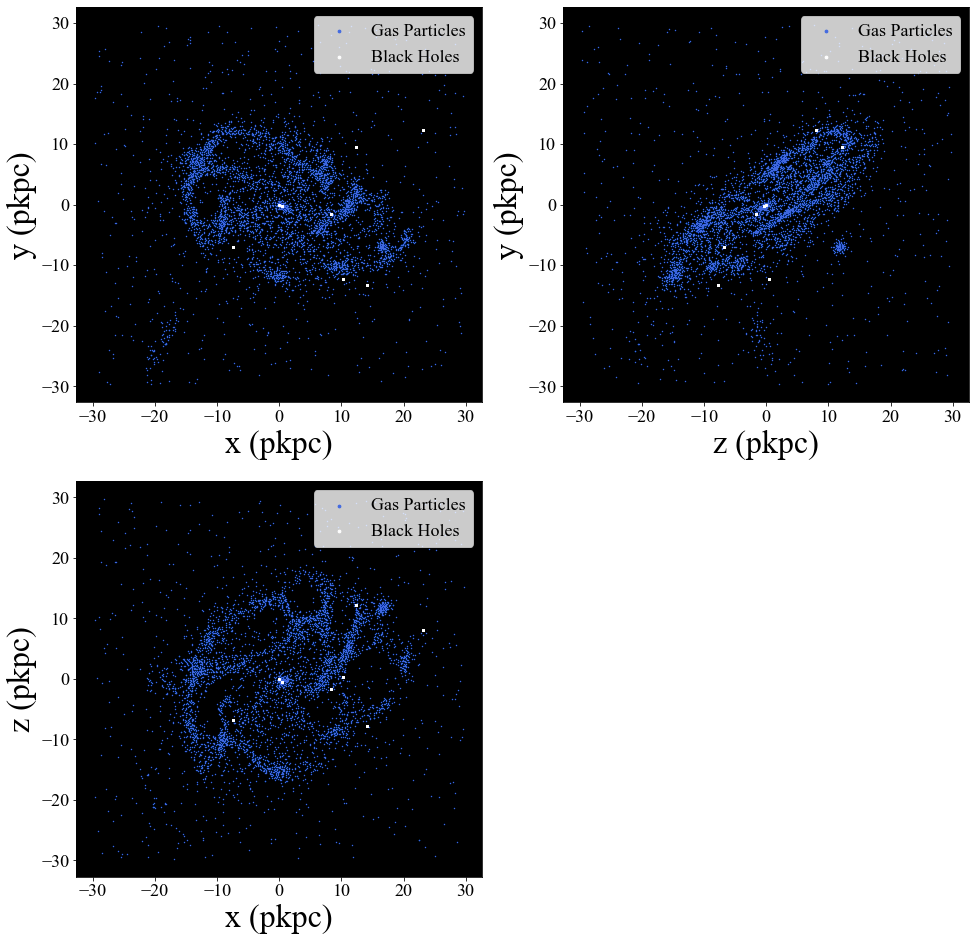

In [24]:
filenum = 0

p, q = 3, 3
all_coords = [[0 for x in range(p)] for y in range(q)]
all_bh_coords = [[0 for x in range(p)] for y in range(q)]

view_box = [0.02, 0.02, 0.02]

centre = [28.326, 2.614, 21.519]
for i in range(0, 3):
    centre[i] = centre[i]/h

lower_bounds = [28.326, 2.614, 21.519]
for i in range(0, 3):
    lower_bounds[i] -= view_box[i]

upper_bounds = [28.326, 2.614, 21.519]
for i in range(0, 3):
    upper_bounds[i] += view_box[i]


for i in range(-1, 15):
    
    snapfile = os.path.join(data_location , model , sim , f'snapshot_{tag}', f'snap_{tag}.{filenum}.hdf5')
    #print("File is currently ",tag,".", filenum, ".hdf5")
    snapshot = pyread_eagle.EagleSnapshot(snapfile)


    coords = particle_read(0, "Coordinates", lower_bounds, upper_bounds, data_location, snapshot, centre = centre, model = model, sim = sim, tag = tag)
    coords_centre_adjusted = coords - centre
    coords_box_wrapped = ((coords_centre_adjusted + (boxsize/2)) % boxsize) - (boxsize/2)
    all_coords = np.concatenate((all_coords, coords_box_wrapped))

    bh_coords = particle_read(5, "Coordinates", lower_bounds, upper_bounds, data_location, snapshot, centre = centre, model = model, sim = sim, tag = tag)
    bh_coords_centre_adjusted = bh_coords - centre
    bh_coords_box_wrapped = ((bh_coords_centre_adjusted + (boxsize/2)) % boxsize) - (boxsize/2)
    all_bh_coords = np.concatenate((all_bh_coords, bh_coords_box_wrapped))
    
    filenum += 1

for i in range(0, 3):
    all_coords[:,i] = [x*1000 for x in all_coords[:,i]]
    all_bh_coords[:,i] = [x*1000 for x in all_bh_coords[:,i]]
    
fig = plt.figure(figsize=(16, 16))

ax = plt.subplot(2,2,1)
ax.scatter(all_coords[:,0],all_coords[:,1], label = 'Gas Particles', marker='.',c='royalblue',s=0.05)
ax.scatter(all_bh_coords[:,0],all_bh_coords[:,1],label = 'Black Holes', marker='.',c='w',s=15)
plt.xlabel("x (pkpc)")
plt.ylabel("y (pkpc)")
ax.set_facecolor('black')
ax.yaxis.label.set_size(32)
ax.xaxis.label.set_size(32)
lgnd = plt.legend(loc=1)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

ax = plt.subplot(2,2,2)
ax.scatter(all_coords[:,2],all_coords[:,1],label = 'Gas Particles',marker='.',c='royalblue',s=0.05)
ax.scatter(all_bh_coords[:,2],all_bh_coords[:,1], label = 'Black Holes', marker='.',c='w',s=15)
plt.xlabel("z (pkpc)")
plt.ylabel("y (pkpc)")
ax.set_facecolor('black')
ax.yaxis.label.set_size(32)
ax.xaxis.label.set_size(32)
lgnd = plt.legend(loc=1)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

ax = plt.subplot(2,2,3)
ax.scatter(all_coords[:,0],all_coords[:,2],label = 'Gas Particles', marker='.',c='royalblue',s=0.05)
ax.scatter(all_bh_coords[:,0],all_bh_coords[:,2],label = 'Black Holes',marker='.',c='w',s=15)
plt.xlabel("x (pkpc)")
plt.ylabel("z (pkpc)")
ax.set_facecolor('black')
ax.yaxis.label.set_size(32)
ax.xaxis.label.set_size(32)
lgnd = plt.legend(loc=1)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

plt.savefig('Dark_Matter_Halo_Type0-5_cumulative.pdf')
plt.show()

## Re-Modelling the Halo as a 3D Projection

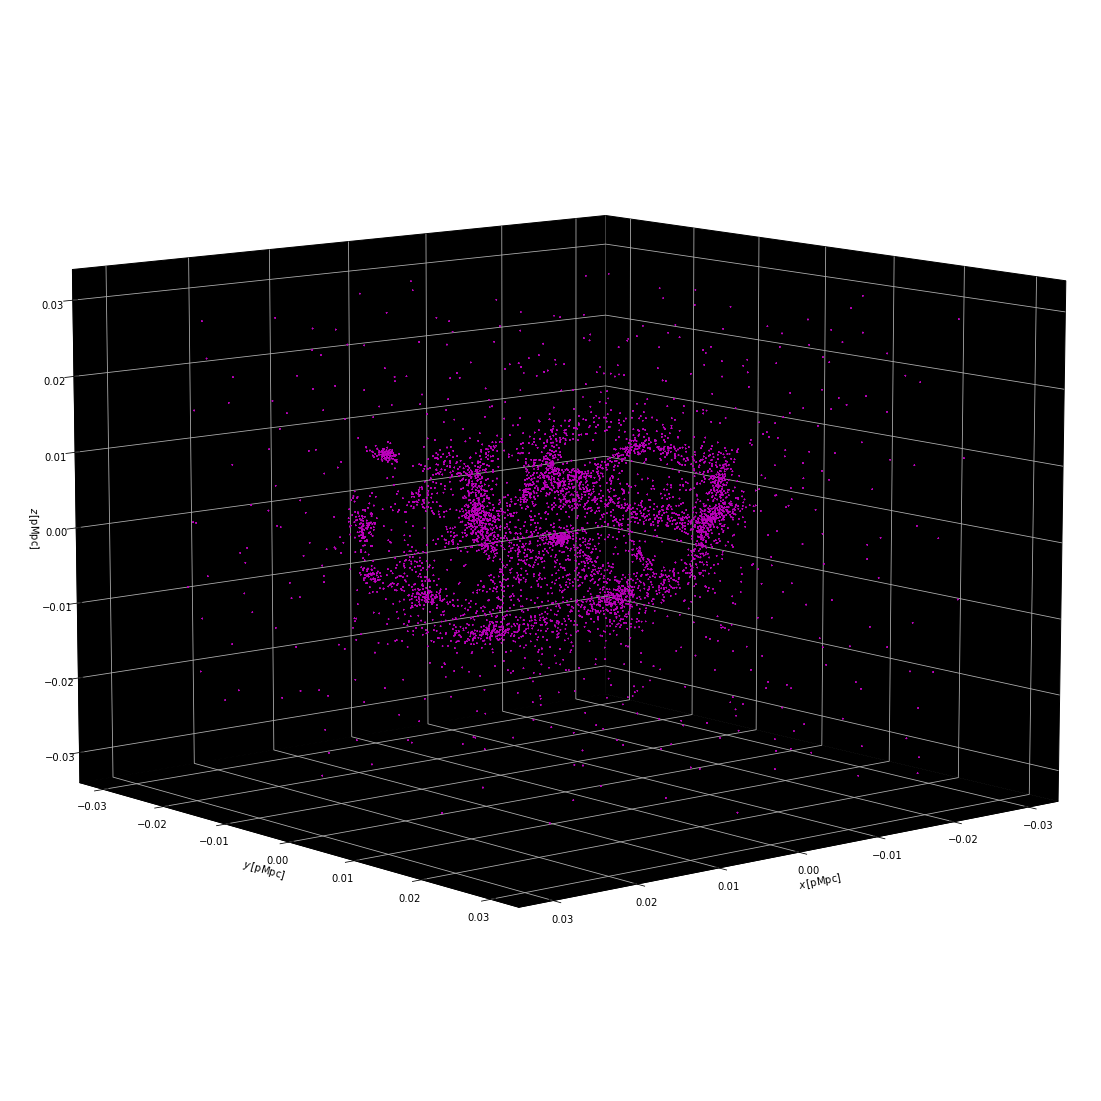

In [4]:
from mpl_toolkits import mplot3d


fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel(r'$x\,[{\rm pMpc}]$')
ax.set_ylabel(r'$y\,[{\rm pMpc}]$')
ax.set_zlabel(r'$z\,[{\rm pMpc}]$')
ax.w_xaxis.set_pane_color((0, 0, 0, 1))
ax.w_yaxis.set_pane_color((0, 0, 0, 1))
ax.w_zaxis.set_pane_color((0, 0, 0, 1))
plt.rcParams['grid.linewidth'] = 1
ax.scatter3D(all_coords[:,0],all_coords[:,1],all_coords[:,2], s=0.1, c='m');

ax.azim = 50
ax.elev = 10

## A Script to Generate a 3D Rotating Animation of the Halo 

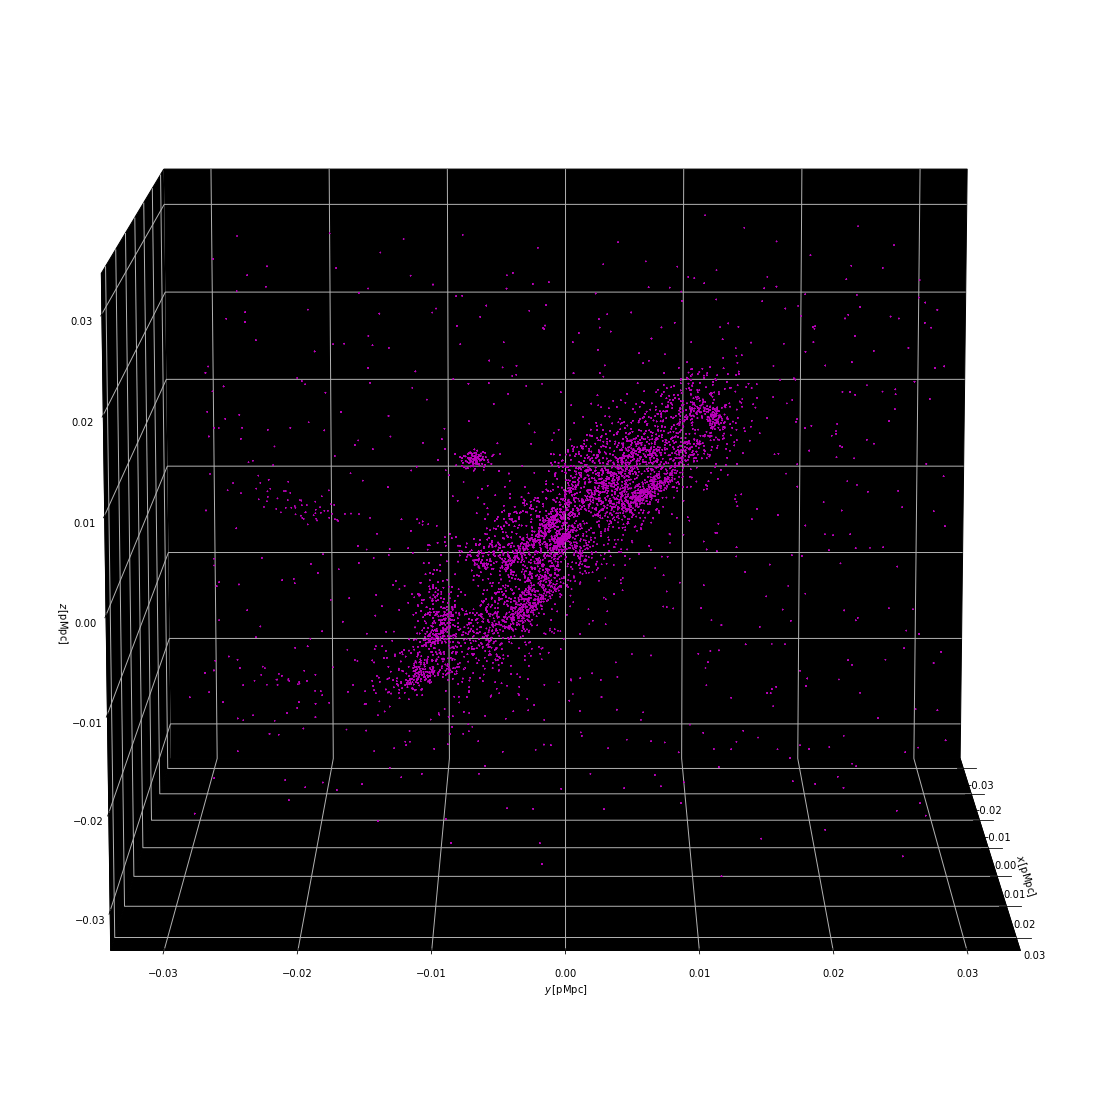

In [5]:
from matplotlib import animation

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel(r'$x\,[{\rm pMpc}]$')
ax.set_ylabel(r'$y\,[{\rm pMpc}]$')
ax.set_zlabel(r'$z\,[{\rm pMpc}]$')
ax.w_xaxis.set_pane_color((0, 0, 0, 1))
ax.w_yaxis.set_pane_color((0, 0, 0, 1))
ax.w_zaxis.set_pane_color((0, 0, 0, 1))
plt.rcParams['grid.linewidth'] = 0.1
ax.scatter3D(all_coords[:,0],all_coords[:,1],all_coords[:,2], s=0.1, c='m');
ax.azim = 0
ax.elev = 10
ax.dist = 8.2

def update(angle_interval):
    ax.azim += 1

angle_interval = 1
N = 360

#ani = animation.FuncAnimation(fig, update, N, interval=50, blit=False)
#ani.save("3D-Projection_Close.gif")
plt.show()

In [8]:
print(h)

0.6727
0.6727000000000003
